In [10]:
pip uninstall numpy --yes

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install opencv-python mediapipe scikit-learn matplotlib

You should consider upgrading via the '/Users/nithyapandurangan/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.


In [8]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def analyze_hair_color(image_path):
    # Initialize MediaPipe
    model_path = "hair_segmenter.tflite"
    base_options = python.BaseOptions(model_asset_path=model_path)
    options = vision.ImageSegmenterOptions(base_options=base_options, output_category_mask=True)
    
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found")
        return None
    
    # Segment hair
    with vision.ImageSegmenter.create_from_options(options) as segmenter:
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        segmentation_result = segmenter.segment(mp_image)
        category_mask = segmentation_result.category_mask.numpy_view()
    
    # Create visualization (EXACTLY like your original)
    hair_contour = np.zeros_like(image)
    hair_contour[category_mask == 1] = image[category_mask == 1]  # Preserve original hair colors
    contours, _ = cv2.findContours(category_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
    
    # Extract hair pixels for analysis
    hair_pixels = image[category_mask == 1]
    if len(hair_pixels) == 0:
        print("No hair detected")
        return None
    
    # Get dominant BGR color via K-means
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans.fit(hair_pixels)
    dominant_bgr = kmeans.cluster_centers_[np.argmax(np.bincount(kmeans.labels_))].astype(int)
    
    # Convert to other color spaces
    dominant_rgb = cv2.cvtColor(np.uint8([[dominant_bgr]]), cv2.COLOR_BGR2RGB)[0][0]
    mean_hsv = cv2.cvtColor(np.uint8([[dominant_bgr]]), cv2.COLOR_BGR2HSV)[0][0]
    mean_lab = cv2.cvtColor(np.uint8([[dominant_bgr]]), cv2.COLOR_BGR2LAB)[0][0]
    
    # Create color swatch
    color_swatch = np.full((100, 100, 3), dominant_rgb, dtype=np.uint8)
    
    # Display results
    plt.figure(figsize=(15, 5))
    
    # Left: Original image with green contours
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.title('Original + Contours')
    plt.axis('off')
    
    # Middle: Hair pixels only (original colors)
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(hair_contour, cv2.COLOR_BGR2RGB))
    plt.title('Isolated Hair (Original Colors)')
    plt.axis('off')
    
    # Right: Dominant color swatch
    plt.subplot(1, 3, 3)
    plt.imshow(color_swatch)
    plt.title(f'Dominant Color\nBGR: {dominant_bgr}\nRGB: {dominant_rgb}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Dominant BGR: {dominant_bgr}")
    print(f"Mean HSV: {mean_hsv}")
    print(f"Mean LAB: {mean_lab}")
    
    return {
        'dominant_bgr': dominant_bgr.tolist(),
        'mean_hsv': mean_hsv.tolist(),
        'mean_lab': mean_lab.tolist()
    }
    
# Usage
result = analyze_hair_color(r"/Users/nithyapandurangan/Documents/colour-analysis-tool/flask/Dataset/Seasons/bright_spring_45.jpg")

ImportError: cannot import name 'implement_array_function' from 'numpy.core._multiarray_umath' (/Users/nithyapandurangan/.pyenv/versions/3.9.7/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so)

In [1]:
pip list | grep numpy

You should consider upgrading via the '/Users/nithyapandurangan/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.23.5

     |████████████████████████████████| 13.4 MB 442 kB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
You should consider upgrading via the '/Users/nithyapandurangan/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip list | grep numpy

numpy                        1.23.5
You should consider upgrading via the '/Users/nithyapandurangan/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


I0000 00:00:1744312865.316191 5755215 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1744312865.346465 5759533 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/nithyapandurangan/.pyenv/versions/3.9.7/lib/python3.9/site-packages/mediapipe/tasks/python/vision/image_segmenter.py:158: UserWarning: MessageFactory class is deprecated. Please use GetMessageClass() instead of MessageFactory.GetPrototype. MessageFactory class will be removed after 2024.
  graph_config = self._runner.get_graph_config()


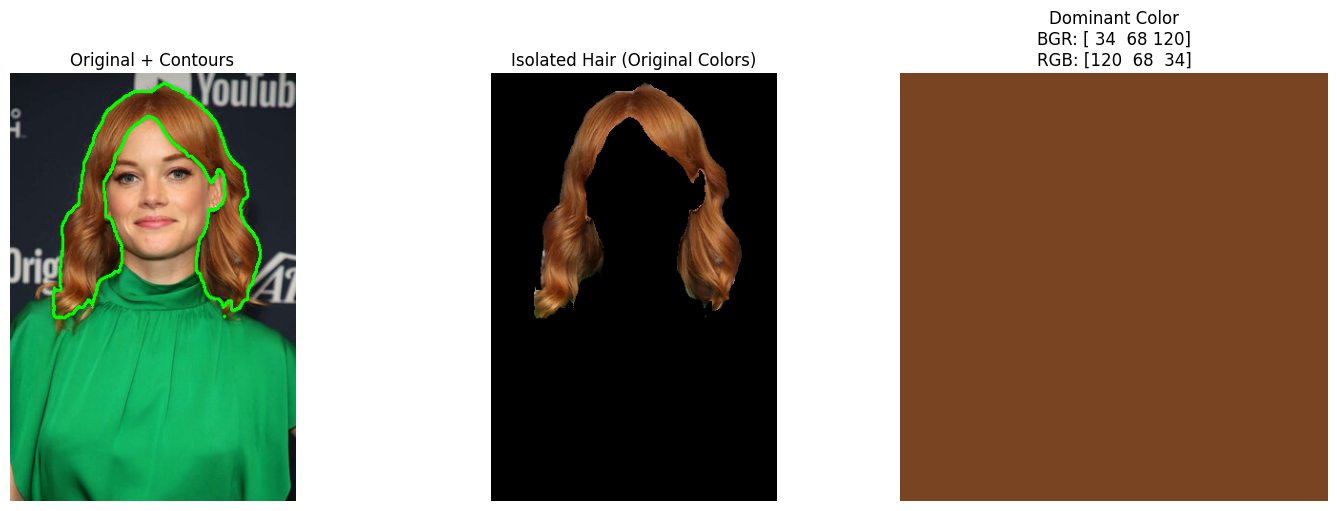

Dominant BGR: [ 34  68 120]
Mean HSV: [ 12 183 120]
Mean LAB: [ 88 147 157]


In [2]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def analyze_hair_color(image_path):
    # Initialize MediaPipe
    model_path = "hair_segmenter.tflite"
    base_options = python.BaseOptions(model_asset_path=model_path)
    options = vision.ImageSegmenterOptions(base_options=base_options, output_category_mask=True)
    
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found")
        return None
    
    # Segment hair
    with vision.ImageSegmenter.create_from_options(options) as segmenter:
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        segmentation_result = segmenter.segment(mp_image)
        category_mask = segmentation_result.category_mask.numpy_view()
    
    # Create visualization (EXACTLY like your original)
    hair_contour = np.zeros_like(image)
    hair_contour[category_mask == 1] = image[category_mask == 1]  # Preserve original hair colors
    contours, _ = cv2.findContours(category_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
    
    # Extract hair pixels for analysis
    hair_pixels = image[category_mask == 1]
    if len(hair_pixels) == 0:
        print("No hair detected")
        return None
    
    # Get dominant BGR color via K-means
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans.fit(hair_pixels)
    dominant_bgr = kmeans.cluster_centers_[np.argmax(np.bincount(kmeans.labels_))].astype(int)
    
    # Convert to other color spaces
    dominant_rgb = cv2.cvtColor(np.uint8([[dominant_bgr]]), cv2.COLOR_BGR2RGB)[0][0]
    mean_hsv = cv2.cvtColor(np.uint8([[dominant_bgr]]), cv2.COLOR_BGR2HSV)[0][0]
    mean_lab = cv2.cvtColor(np.uint8([[dominant_bgr]]), cv2.COLOR_BGR2LAB)[0][0]
    
    # Create color swatch
    color_swatch = np.full((100, 100, 3), dominant_rgb, dtype=np.uint8)
    
    # Display results
    plt.figure(figsize=(15, 5))
    
    # Left: Original image with green contours
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.title('Original + Contours')
    plt.axis('off')
    
    # Middle: Hair pixels only (original colors)
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(hair_contour, cv2.COLOR_BGR2RGB))
    plt.title('Isolated Hair (Original Colors)')
    plt.axis('off')
    
    # Right: Dominant color swatch
    plt.subplot(1, 3, 3)
    plt.imshow(color_swatch)
    plt.title(f'Dominant Color\nBGR: {dominant_bgr}\nRGB: {dominant_rgb}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Dominant BGR: {dominant_bgr}")
    print(f"Mean HSV: {mean_hsv}")
    print(f"Mean LAB: {mean_lab}")
    
    return {
        'dominant_bgr': dominant_bgr.tolist(),
        'mean_hsv': mean_hsv.tolist(),
        'mean_lab': mean_lab.tolist()
    }
    
# Usage
result = analyze_hair_color(r"/Users/nithyapandurangan/Documents/colour-analysis-tool/flask/Dataset/Seasons/bright_spring_45.jpg")